In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset
from matplotlib import pyplot as plt

c:\Users\mai\anaconda3\envs\bmc\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

number of training data :  60000
number of test data :  10000


In [ ]:
mnist = read("training", path="./mnist")
show(mnist[n 번째 데이터][1])

In [13]:
train_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/02/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, num_workers=4)

In [10]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [12]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


In [14]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [15]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred.to('cpu'), y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device)).to('cpu')
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [193]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306836  [    0/60000]
loss: 2.301640  [ 6400/60000]
loss: 2.296018  [12800/60000]
loss: 2.289612  [19200/60000]
loss: 2.282989  [25600/60000]
loss: 2.283163  [32000/60000]
loss: 2.284438  [38400/60000]
loss: 2.277572  [44800/60000]
loss: 2.273957  [51200/60000]
loss: 2.259861  [57600/60000]
Test Error: 
 Accuracy: 36.6%, Avg loss: 2.259657 

Epoch 2
-------------------------------
loss: 2.262303  [    0/60000]
loss: 2.254974  [ 6400/60000]
loss: 2.258946  [12800/60000]
loss: 2.243677  [19200/60000]
loss: 2.226478  [25600/60000]
loss: 2.238956  [32000/60000]
loss: 2.233966  [38400/60000]
loss: 2.231411  [44800/60000]
loss: 2.196052  [51200/60000]
loss: 2.202729  [57600/60000]
Test Error: 
 Accuracy: 58.1%, Avg loss: 2.198227 

Epoch 3
-------------------------------
loss: 2.217794  [    0/60000]
loss: 2.194479  [ 6400/60000]
loss: 2.177497  [12800/60000]
loss: 2.178800  [19200/60000]
loss: 2.154648  [25600/60000]
loss: 2.153645  [32000/600

---
## Active Learning

In [1]:
import sys

import sklearn.datasets
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchvision import datasets, transforms

import pandas as pd
import matplotlib.pyplot as plt

c:\Users\mai\anaconda3\envs\bmc\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")
# import pickle
# with open('data.p', 'wb') as f:
#     pickle.dump(mnist, f)

In [2]:
import pickle
with open("data.p", 'rb') as f:
    mnist = pickle.load(f)

In [3]:
Data = mnist["data"]
Data["target"] = mnist["target"]

Data = Data.sample(frac=1)
Data = Data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [4]:
Image = Data.iloc[:,:-1].to_numpy().reshape(-1,28,28)
Label = Data.iloc[:,-1:].astype(int).to_numpy()

In [5]:
Image = torch.from_numpy(Image)
Label = torch.from_numpy(Label).to(torch.float32)

In [13]:
class MnistDataset(Dataset):
    def __init__(self, image, label, transform=None):
        self.img = image
        self.label = label
        self.transform = transform

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        digit = self.img[idx].reshape(28,28)
        if self.transform:
            digit = self.transform(digit)
        return digit, self.label[idx][0]

In [22]:
class MnistDataset(TensorDataset):
    def __init__(self, image, label, transform=None):
        self.img = image
        self.label = label
        self.transform = transform

    def __len__(self):

    def __getitem__(self, idx):
        digit = Image[idx].reshape(28,28)
        if self.transform:
            digit = self.transform(digit)
        return digit, Label[idx][0]

In [14]:
train_data2 = MnistDataset(Image[:10], Label[:], transform=transforms.ToTensor())

In [ ]:
class SimpleCustomBatch:
    def __init__(self, data):
        transposed_data = list(zip(*data))
        self.inp = torch.stack(transposed_data[0], 0)
        self.tgt = torch.stack(transposed_data[1], 0)

    # custom memory pinning method on custom type
    def pin_memory(self):
        self.inp = self.inp.pin_memory()
        self.tgt = self.tgt.pin_memory()
        return self

def collate_wrapper(batch):
    return SimpleCustomBatch(batch)

inps = torch.arange(10 * 5, dtype=torch.float32).view(10, 5)
tgts = torch.arange(10 * 5, dtype=torch.float32).view(10, 5)
dataset = TensorDataset(inps, tgts)

loader = DataLoader(dataset, batch_size=2, collate_fn=collate_wrapper,
                    pin_memory=True)

for batch_ndx, sample in enumerate(loader):
    print(sample.inp.is_pinned())
    print(sample.tgt.is_pinned())

In [15]:
train_features2, train_labels2 = next(iter(train_data2))

In [16]:
train_labels2

1

In [17]:
train_features2.shape

torch.Size([1, 28, 28])

In [17]:
train_dataloader1 = DataLoader(TensorDataset(Image, Label), batch_size=64,num_workers=4)

In [18]:
train_dataloader2 = DataLoader(train_data2, batch_size=4,num_workers=2)

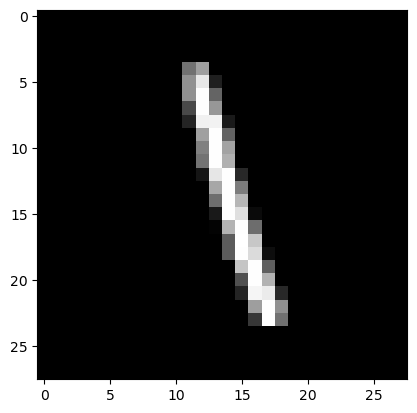

Label: tensor([1], dtype=torch.int32)


In [18]:
train_features, train_labels = next(iter(train_dataloader1))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [19]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader1, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------


RuntimeError: expected scalar type Float but found Double

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_full = x_train[:4000] / 255
y_full = y_train[:4000]
x_test = x_test[:400] /255
y_test = y_test[:400]

In [6]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array(['5'], dtype=object)

In [211]:
indices = torch.randperm(X.size(0))

TypeError: 'numpy.int32' object is not callable

In [215]:
X, y = mnist["data"], mnist["target"]

In [81]:
X, y = mnist["data"], mnist["target"]

In [216]:
X.shape

(70000, 784)

In [82]:
train_set = 
test_set = X[10000:]

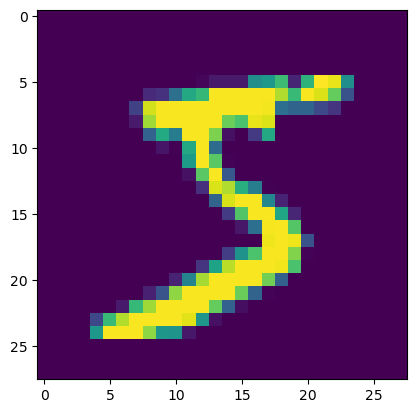

In [83]:
plt.imshow(tmp)

70000

데이터 구성